In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
healthcare = pd.read_csv('/content/healthcare.csv')
healthcare.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [3]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8    Total Discharges                     163065 non-null  int64  
 9    Average Covered Charges              163065 non-null  float64
 10   Average Total Payments               163065 non-null  float64
 11  

In [4]:
healthcare.shape

(163065, 12)

In [5]:
healthcare['Provider State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'TX', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
       'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [6]:
healthcare['DRG Definition'].unique()

array(['039 - EXTRACRANIAL PROCEDURES W/O CC/MCC',
       '057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC',
       '069 - TRANSIENT ISCHEMIA',
       '064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC',
       '065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC',
       '066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC',
       '074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O MCC',
       '101 - SEIZURES W/O MCC', '149 - DYSEQUILIBRIUM',
       '176 - PULMONARY EMBOLISM W/O MCC',
       '177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC',
       '189 - PULMONARY EDEMA & RESPIRATORY FAILURE',
       '178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC',
       '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC',
       '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC',
       '193 - SIMPLE PNEUMONIA & PLEURISY W MCC',
       '194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/O CC/MCC',
       '195 - SIMPLE P

In [7]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']

In [8]:
chest_pain.shape

(2230, 12)

In [9]:
ch_pain_counts_in_states = chest_pain['Provider State'].value_counts()

In [10]:
ch_pain_counts_in_states.values

array([201, 164, 144, 137, 107,  99,  98,  70,  69,  67,  62,  61,  58,
        55,  52,  52,  52,  50,  44,  44,  40,  37,  36,  35,  34,  32,
        30,  30,  26,  24,  24,  23,  21,  19,  18,  15,  14,  13,  10,
         8,   7,   7,   7,   5,   5,   5,   5,   4,   4,   4,   2])

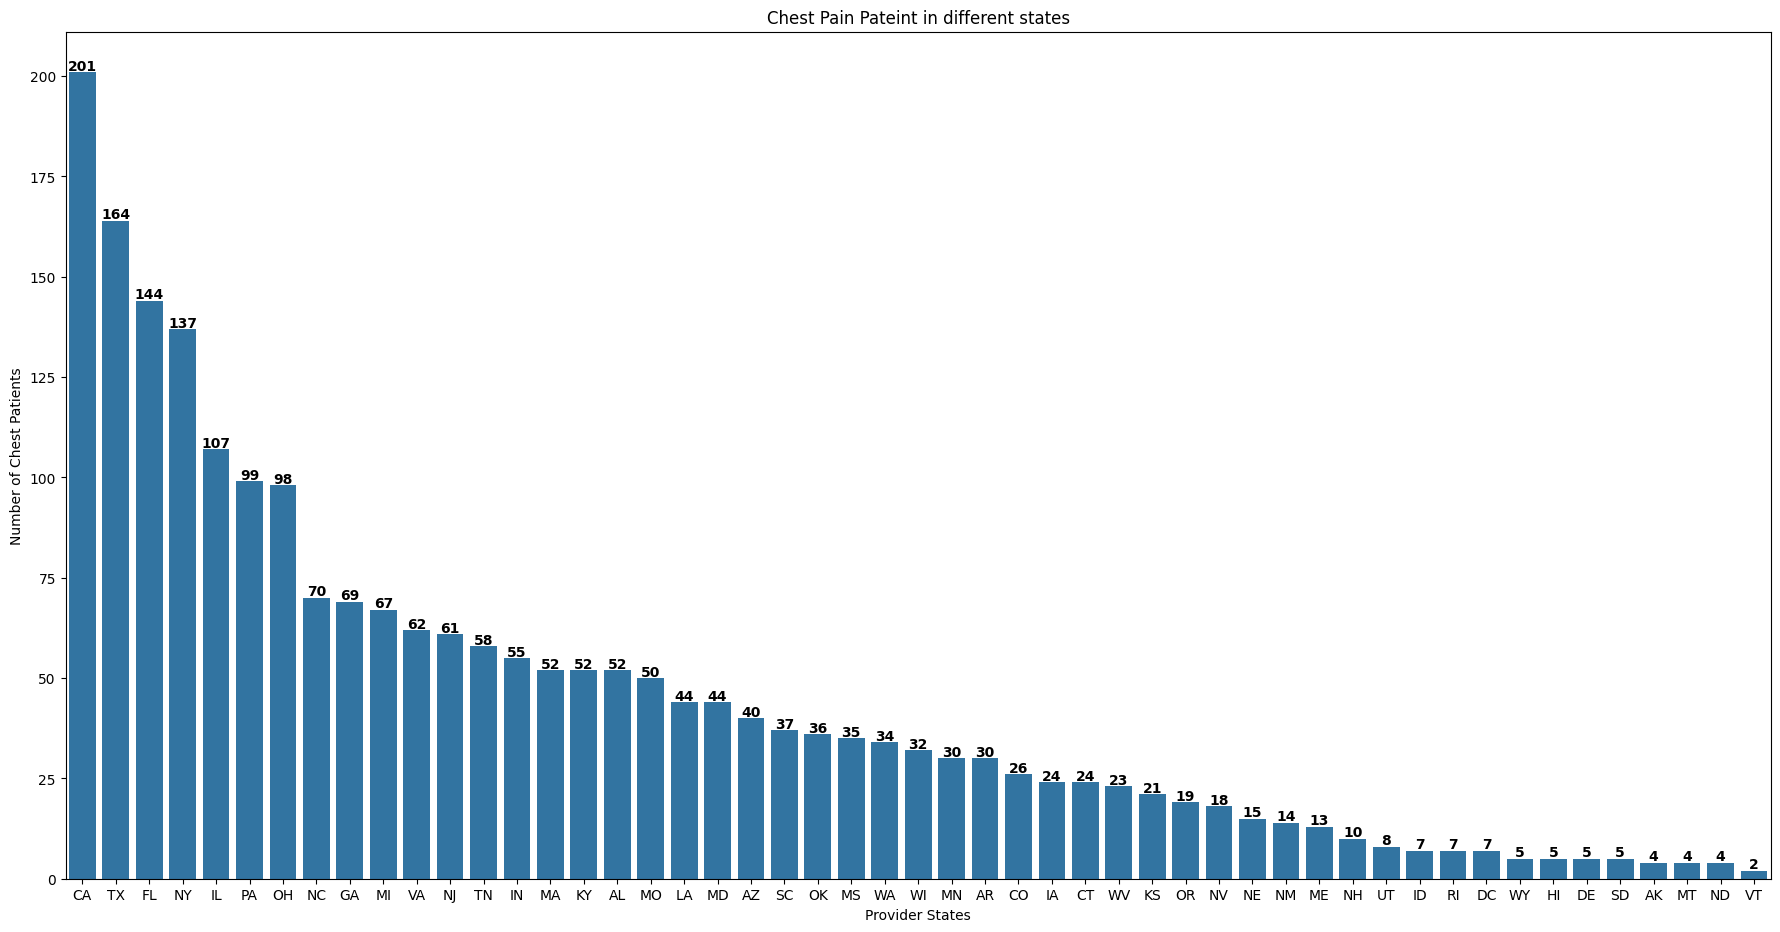

In [11]:
plt.figure(figsize=(22,11))
sns.barplot(x=ch_pain_counts_in_states.index, y=ch_pain_counts_in_states.values)
plt.title("Chest Pain Pateint in different states")
plt.xlabel("Provider States")
plt.ylabel("Number of Chest Patients")

for i, count in enumerate(ch_pain_counts_in_states.values):
    plt.text(i, count + 0.5, str(count), ha="center", fontsize=10, fontweight='bold')
plt.show()

In [12]:
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == "AL"]

In [13]:
alabama_chest_pain.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
82205,313 - CHEST PAIN,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,36,19540.55,3428.58,2093.38
82206,313 - CHEST PAIN,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,13,20241.84,3849.76,1704.53


In [14]:
cost = alabama_chest_pain[' Average Covered Charges '].values

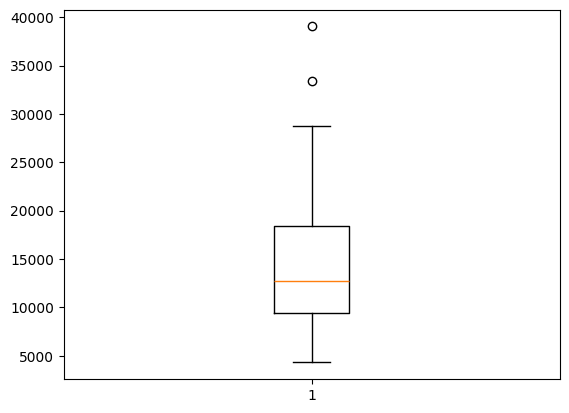

In [15]:
plt.boxplot(x=cost)
plt.show()

In [16]:
datasets = []
for state in chest_pain['Provider State']:
    datasets.append(chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values)

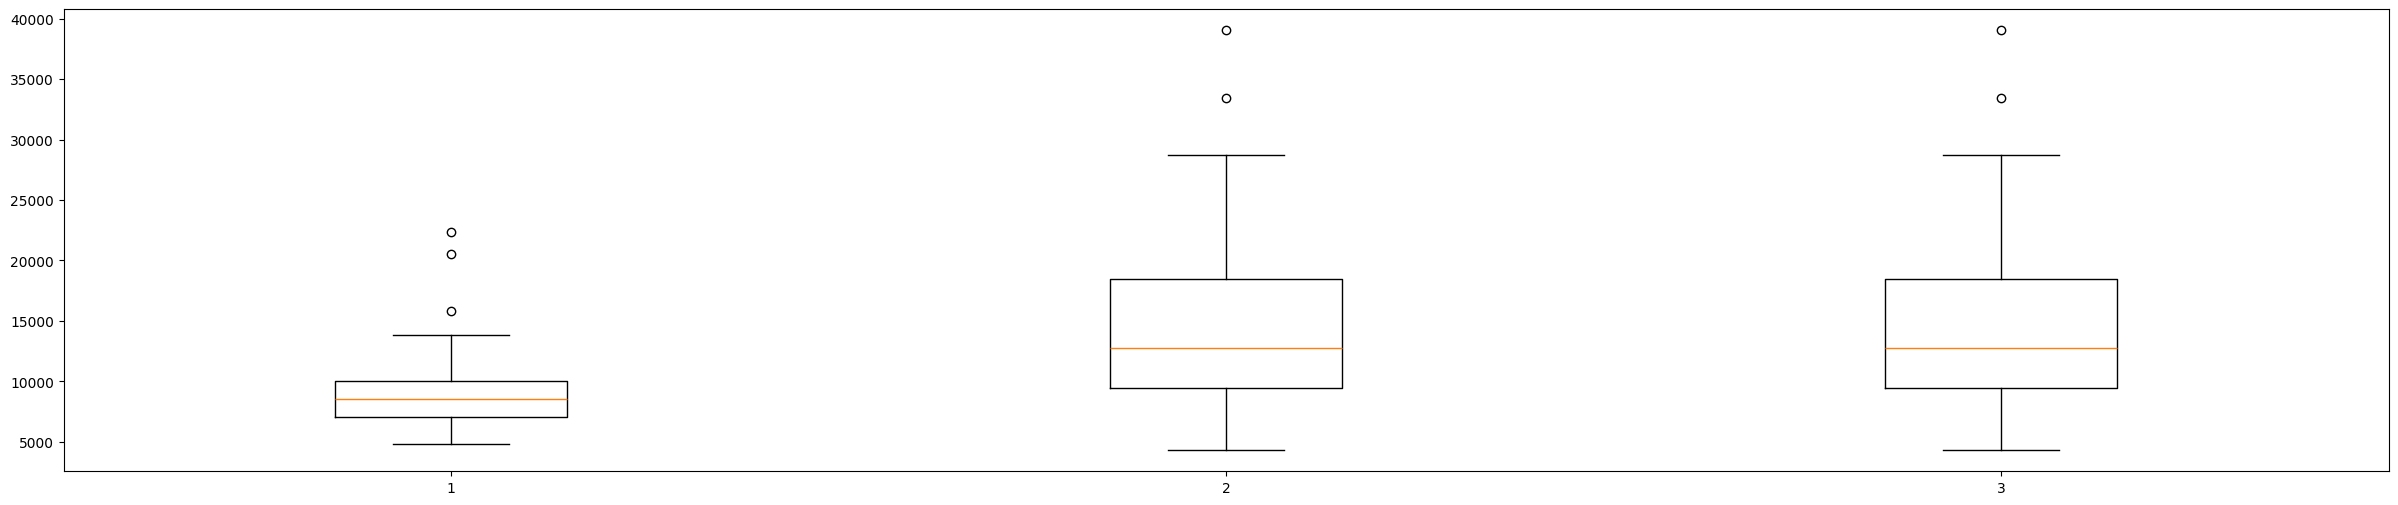

In [18]:
plt.figure(figsize=(30,6))
plt.boxplot(x=datasets[0:3], label='states')
plt.show()